In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from linear import *
from loss import *

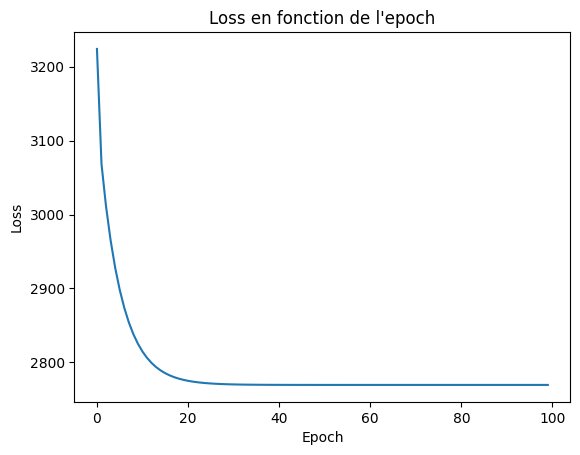

In [2]:
# On génère des données aléatoires

X= np.random.uniform(-5,5,50).reshape((-1,1))
y = -4 * X + -2 +( np.random.uniform(-100,100,50).reshape((-1,1)))


# Paramètres
input_dim = X.shape[1]
output_dim = y.shape[1]
epoch = 100
losses = []
Loss = MSELoss()
_linear = Linear(input_dim, output_dim)
    
# Loop d'apprentissage
for i in range(epoch) :
    # Forward
    yhat = _linear.forward(X)   
    
    # Backward          
    losses.append(Loss.forward(yhat,y).mean())
    loss_backward = Loss.backward(y, yhat)
    delat_w = _linear.backward_delta(X, loss_backward)
    _linear.backward_update_gradient(X, loss_backward)
        
    # Update
    _linear.update_parameters(gradient_step=1e-3) 
    _linear.zero_grad()

yhat = _linear.forward(X)
      
# Plot

plt.figure()
plt.plot(np.arange(epoch),losses)
plt.title("Loss en fonction de l'epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()
    

